# Setup

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
date_filename = "2018-01-01_2018-01-31"

In [3]:
data = pd.read_csv("articles_" + date_filename + ".csv", index_col="id", \
                   parse_dates=["published", "discovered"])
data.head()

,url,headline,discovered,published,fb_engagements,fb_max_engagements_per_min,fb_max_engagements_per_min_time,fb_comments,fb_reactions,fb_shares,publisher_name,publisher_id,mins_as_lead,mins_on_front,num_articles_on_front,fb_brand_page,fb_brand_page_likes,fb_brand_page_time,alexa_rank,word_count
id,,,,,,,,,,,,,,,,,,,,
6709592f25cbe37c8c42157a3e31529a6997d919,https://www.thetimes.co.uk/article/the-ashes-e...,"The Ashes: England need 90mph-plus bowlers, sa...",2018-01-01 11:44:10.414,2018-01-01,6,0.032787,2018-01-01T19:02:07.273Z,0,4,2,The Times,thetimes_co_uk,0,735,224.0,False,NaN,NaN,6435,125.0
e11638f9f5eb587404372cc1f1554a828ae6ef90,https://www.thetimes.co.uk/article/wilfried-za...,Wilfried Zaha did well and should not face ban...,2018-01-01 11:44:10.834,2018-01-01,0,0.000000,2018-01-01T19:02:07.293Z,0,0,0,The Times,thetimes_co_uk,0,270,224.0,False,NaN,NaN,6435,125.0
9b64c5e6ba5cfd51dad3619a8ea341eba1a12d01,https://www.thetimes.co.uk/article/crystal-pal...,Crystal Palace worked hard to stem Manchester ...,2018-01-01 11:44:12.831,2018-01-01,0,0.000000,2018-01-01T19:02:07.303Z,0,0,0,The Times,thetimes_co_uk,0,735,224.0,False,NaN,NaN,6435,125.0
bc098ae138bc4659f0d723dd13a6df94bf27de1c,https://www.thetimes.co.uk/article/british-ceo...,British CEO Richard Cousins and family killed ...,2018-01-01 10:44:08.985,2018-01-01,2,0.032787,2018-01-01T13:57:17.529Z,0,0,2,The Times,thetimes_co_uk,724,795,224.0,False,NaN,NaN,6435,125.0
295570fc56f70ffec0f5c1c13028640a988f90e1,https://www.thetimes.co.uk/article/referee-jon...,Referee Jon Moss in wrong place to award penalty,2018-01-01 11:39:07.331,2018-01-01,0,0.000000,2018-01-01T19:57:06.317Z,0,0,0,The Times,thetimes_co_uk,0,740,224.0,False,NaN,NaN,6435,125.0


# Response Score

The response score is a number between 0 and 50 that indicates the level of response to an article.



Perhaps in the future we may choose to include other factors, but for now we just include engagements on Facebook. The maximum score of 50 should be achieved by an article that does really well compared with others.

In [4]:
pd.options.display.float_format = '{:.2f}'.format
data.fb_engagements.describe([0.5, 0.75, 0.9, 0.95, 0.99, 0.995, 0.999])

count    153117.00
mean       1108.49
std        8278.99
min           0.00
50%          26.00
75%         256.00
90%        1621.00
95%        4095.20
99%       19918.88
99.5%     32935.68
99.9%     89239.94
max     1077082.00
Name: fb_engagements, dtype: float64

There's 1 article with more than 1 million engagements this month.

In [5]:
data[data.fb_engagements > 1000000]

,url,headline,discovered,published,fb_engagements,fb_max_engagements_per_min,fb_max_engagements_per_min_time,fb_comments,fb_reactions,fb_shares,publisher_name,publisher_id,mins_as_lead,mins_on_front,num_articles_on_front,fb_brand_page,fb_brand_page_likes,fb_brand_page_time,alexa_rank,word_count
id,,,,,,,,,,,,,,,,,,,,
bff3221285a08a6b4a931a08fa55a8dab8dcd83a,https://www.washingtonpost.com/politics/trump-...,Trump attacks protections for immigrants from ...,2018-01-11 21:43:16.311,2018-01-11 21:37:00,1077082,2928.83,2018-01-11T22:16:05.460Z,362995,622561,91526,The Washington Post,washingtonpost_com,725,2158,87.00,True,6113598.00,2018-01-11T21:41:41.000Z,191,313.00


In [6]:
data.fb_engagements.mode()

0    0
dtype: int64

*november* Going back to the enagement counts, we see the mean is 1,117, mode is zero, median is 24, 90th percentile is 1,453, 99th percentile is 21,166, 99.5th percentile is 33,982. The standard deviation is 8,083, significantly higher than the mean, so this is not a normal distribution. 

*december* Going back to the enagement counts, we see the mean is 1,106, mode is zero, median is 24, 90th percentile is 1,545, 99th percentile is 20,228, 99.5th percentile is 32,446. The standard deviation is 9,852, significantly higher than the mean, so this is not a normal distribution. 

*january 2018* Going back to the enagement counts, we see the mean is 1,108, mode is zero, median is 26, 90th percentile is 1,621, 99th percentile is 19,918, 99.5th percentile is 32,935. The standard deviation is 8,278, significantly higher than the mean, so this is not a normal distribution. 

Key publishers stats

In [7]:
data.groupby("publisher_id").agg({'url': 'count', 'fb_engagements': ['sum', 'median', 'mean']})

url fb_engagements                
                                  count            sum  median    mean
publisher_id                                                          
anotherangryvoice_blogspot_co_uk     28          68554 1762.00 2448.36
bbc_co_uk                         12656        8743859   29.00  690.89
breitbart_com                      2661       11465343  275.00 4308.66
brexitcentral_com                    49          39390  232.00  803.88
buzzfeed_com                       1457        4642842  215.00 3186.58
cnn_com                            4435       19180181  541.00 4324.73
dailymail_co_uk                   24668       16357051   28.00  663.09
economist_com                       484         122211   36.00  252.50
evolvepolitics_com                   64         200556 1325.50 3133.69
foxnews_com                        6824       17698744   48.00 2593.60
ft_com                             4725         400374    4.00   84.74
huffingtonpost_com                 6443       10846012   25.00 1683.38
independent_co_uk                  6278        4906592   38.00  781.55
indy100_com                         525         555345   94.00 1057.80
lemonde_fr                         3835        1942400   66.00  506.49
libdemvoice_org                     156           1952    7.00   12.51
mirror_co_uk                      11168        8388679   45.00  751.14
nbcnews_com                        2061        6240679  432.00 3027.99
newstatesman_com                    470          65882   20.00  140.17
npr_org                            2105        7155373  258.00 3399.23
nytimes_com                        4605       18833832  249.00 4089.87
order-order_com                     246          86229  162.50  350.52
propublica_org                       31          46538  279.00 1501.23
reuters_com                        5849        1964369   21.00  335.85
rt_com                             2521        2049423  297.00  812.94
skwawkbox_org                       121          45462  241.00  375.72
telegraph_co_uk                    6619        2342935   21.00  353.97
thecanary_co                        175         172030  636.00  983.03
theguardian_com                    8208        8937561  125.00 1088.88
thetimes_co_uk                     9479         342359    1.00   36.12
washingtonpost_com                23426       13972718    0.00  596.46
westmonster_com                     330         348369   34.00 1055.66
yournewswire_com                    415        1564515  137.00 3769.92

In [8]:
mean = data.fb_engagements.mean()
median = data.fb_engagements.median()

non_zero_fb_enagagements = data.fb_engagements[data.fb_engagements > 0]

That's a bit better, but still way too clustered at the low end. Let's look at a log normal distribution.

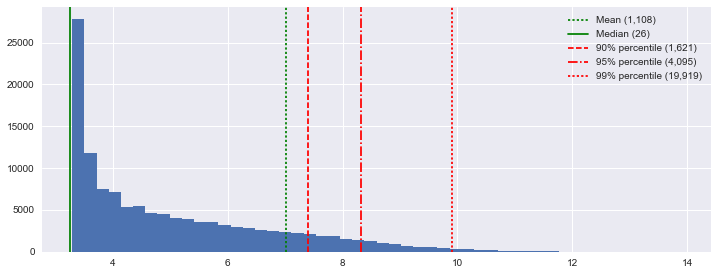

In [9]:
mean = data.fb_engagements.mean()
median = data.fb_engagements.median()
ninety = data.fb_engagements.quantile(.90)
ninetyfive = data.fb_engagements.quantile(.95)
ninetynine = data.fb_engagements.quantile(.99)

plt.figure(figsize=(12,4.5))
plt.hist(np.log(non_zero_fb_enagagements + median), bins=50)
plt.axvline(np.log(mean), linestyle=':', label=f'Mean ({mean:,.0f})', color='green')
plt.axvline(np.log(median), label=f'Median ({median:,.0f})', color='green')
plt.axvline(np.log(ninety), linestyle='--', label=f'90% percentile ({ninety:,.0f})', color='red')
plt.axvline(np.log(ninetyfive), linestyle='-.', label=f'95% percentile ({ninetyfive:,.0f})', color='red')
plt.axvline(np.log(ninetynine), linestyle=':', label=f'99% percentile ({ninetynine:,.0f})', color='red')
leg = plt.legend()


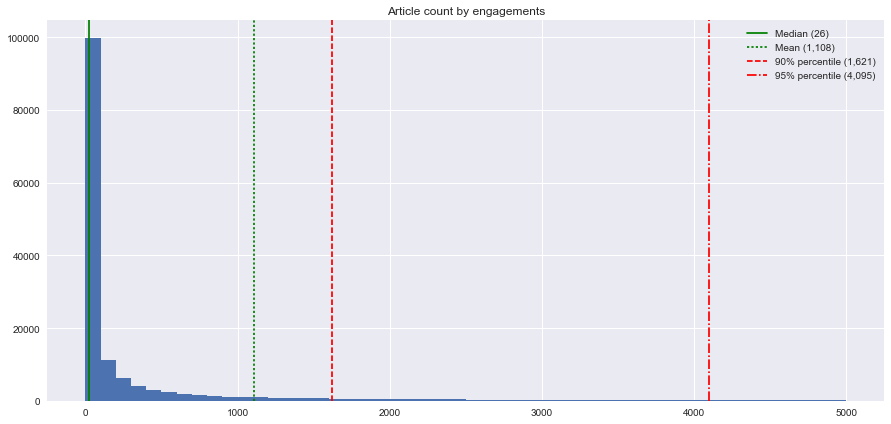

In [10]:
eng = data.fb_engagements[(data.fb_engagements < 5000)]
mean = data.fb_engagements.mean()
median = data.fb_engagements.median()
ninety = data.fb_engagements.quantile(.90)
ninetyfive = data.fb_engagements.quantile(.95)
ninetynine = data.fb_engagements.quantile(.99)

plt.figure(figsize=(15,7))
plt.hist(eng, bins=50)
plt.title("Article count by engagements")
plt.axvline(median, label=f'Median ({median:,.0f})', color='green')
plt.axvline(mean, linestyle=':', label=f'Mean ({mean:,.0f})', color='green')
plt.axvline(ninety, linestyle='--', label=f'90% percentile ({ninety:,.0f})', color='red')
plt.axvline(ninetyfive, linestyle='-.', label=f'95% percentile ({ninetyfive:,.0f})', color='red')
# plt.axvline(ninetynine, linestyle=':', label=f'99% percentile ({ninetynine:,.0f})', color='red')
leg = plt.legend()


In [11]:
log_engagements = (non_zero_fb_enagagements
                   .clip_upper(data.fb_engagements.quantile(.999))
                   .apply(lambda x: np.log(x + median))
                  )
log_engagements.describe()

count   124439.00
mean         5.04
std          1.75
min          3.30
25%          3.56
50%          4.44
75%          6.10
max         11.40
Name: fb_engagements, dtype: float64

Use standard feature scaling to bring that to a 1 to 50 range


In [12]:
def scale_log_engagements(engagements_logged):
    return np.ceil(
        50 * (engagements_logged - log_engagements.min()) / (log_engagements.max() - log_engagements.min())
    )

def scale_engagements(engagements):
    return scale_log_engagements(np.log(engagements + median))

scaled_non_zero_engagements = scale_log_engagements(log_engagements)
scaled_non_zero_engagements.describe()

count   124439.00
mean        11.22
std         10.81
min          0.00
25%          2.00
50%          8.00
75%         18.00
max         50.00
Name: fb_engagements, dtype: float64

In [13]:
# add in the zeros, as zero
scaled_engagements = pd.concat([scaled_non_zero_engagements, data.fb_engagements[data.fb_engagements == 0]])

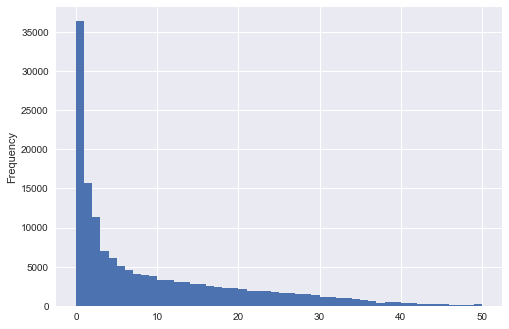

In [14]:
proposed = pd.DataFrame({"fb_engagements": data.fb_engagements, "response_score": scaled_engagements})
proposed.response_score.plot.hist(bins=50)

Looks good to me, lets save that.

In [15]:
data["response_score"] = proposed.response_score

### Proposal

The maximum of 50 points is awarded when the engagements are greater than the 99.9th percentile, rolling over the last month. 

i.e. where $limit$ is the 99.5th percentile of engagements calculated over the previous month, the response score for article $a$ is:

\begin{align}
basicScore_a & = 
\begin{cases} 
   0 & \text{if } engagements_a = 0 \\
   \log(\min(engagements_a,limit) + median(engagements))      & \text{if } engagements_a > 0
\end{cases} \\
responseScore_a & = 
\begin{cases} 
   0 & \text{if } engagements_a = 0 \\
   50 \cdot \frac{basicScore_a - \min(basicScore)}{\max(basicScore) - \min(basicScore)}       & \text{if } engagements_a > 0
\end{cases} \\
\\
\text{The latter equation can be expanded to:} \\
responseScore_a & = 
\begin{cases} 
   0 & \text{if } engagements_a = 0 \\
   50 \cdot 
   \frac{\log(\min(engagements_a,limit) + median(engagements)) - \log(1 + median(engagements))}
   {\log(limit + median(engagements)) - \log(1 + median(engagements))}       & \text{if } engagements_a > 0
\end{cases} \\
\end{align}

# Promotion Score

The aim of the promotion score is to indicate how important the article was to the publisher, by tracking where they chose to promote it. This is a number between 0 and 50 comprised of:

- 20 points based on whether the article was promoted as the "lead" story on the publisher's home page
- 15 points based on how long the article was promoted anywhere on the publisher's home page
- 15 points based on whether the article was promoted on the publisher's main facebook brand page

The first two should be scaled by the popularity/reach of the home page, for which we use the alexa page rank as a proxy.

The last should be scaled by the popularity/reach of the brand page, for which we use the number of likes the brand page has.

### Lead story (20 points)

In [16]:
data.mins_as_lead.describe([0.5, 0.75, 0.9, 0.95, 0.99, 0.995, 0.999])

count   153117.00
mean         9.31
std         95.51
min          0.00
50%          0.00
75%          0.00
90%          0.00
95%          0.00
99%        274.00
99.5%      565.00
99.9%     1204.88
max      11522.00
Name: mins_as_lead, dtype: float64

As expected, the vast majority of articles don't make it as lead. Let's explore how long typically publishers put something as lead for.

In [17]:
lead_articles = data[data.mins_as_lead > 0]

In [18]:
lead_articles.mins_as_lead.describe([0.25, 0.5, 0.75, 0.9, 0.95, 0.99, 0.995, 0.999])

count    4319.00
mean      329.99
std       466.47
min         4.00
25%        89.00
50%       180.00
75%       399.00
90%       834.00
95%      1065.50
99%      1691.22
99.5%    2546.28
99.9%    5381.40
max     11522.00
Name: mins_as_lead, dtype: float64

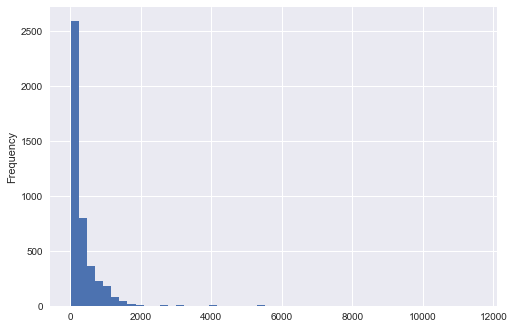

In [19]:
lead_articles.mins_as_lead.plot.hist(bins=50)

For lead, it's a  significant thing for an article to be lead at all, so although we want to penalise articles that were lead for a very short time, mostly we want to score the maximum even if it wasn't lead for ages. So we'll give maximum points when something has been lead for an hour.

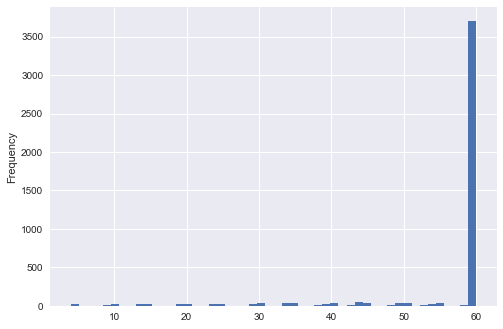

In [20]:
lead_articles.mins_as_lead.clip_upper(60).plot.hist(bins=50)

We also want to scale this by the alexa page rank, such that the maximum score of 20 points is for an article that was on the front for 4 hours for the most popular site.

So lets explore the alexa nunbers.

In [21]:
alexa_ranks = data.groupby(by="publisher_id").alexa_rank.mean().sort_values()
alexa_ranks

publisher_id
bbc_co_uk                               96
cnn_com                                105
nytimes_com                            120
theguardian_com                        142
buzzfeed_com                           147
dailymail_co_uk                        158
washingtonpost_com                     191
huffingtonpost_com                     215
foxnews_com                            285
rt_com                                 365
telegraph_co_uk                        370
independent_co_uk                      386
reuters_com                            497
npr_org                                594
lemonde_fr                             618
mirror_co_uk                           706
nbcnews_com                            826
breitbart_com                          994
ft_com                                1596
economist_com                         1825
indy100_com                           5014
thetimes_co_uk                        6435
newstatesman_com                     1276

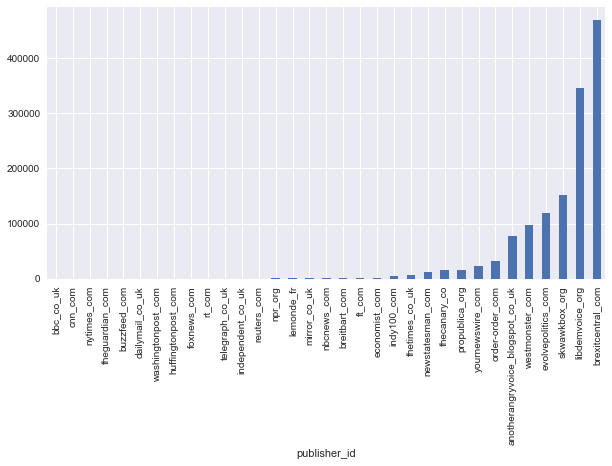

In [22]:
alexa_ranks.plot.bar(figsize=[10,5])

Let's try the simple option first: just divide the number of minutes as lead by the alexa rank. What's the scale of numbers we get then.

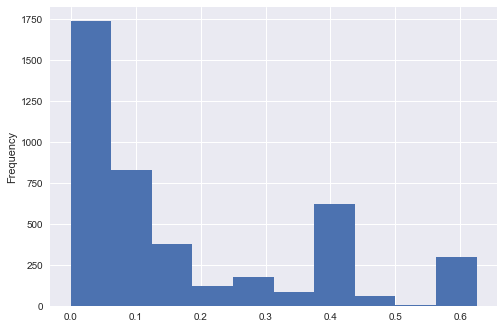

In [23]:
lead_proposal_1 = lead_articles.mins_as_lead.clip_upper(60) / lead_articles.alexa_rank
lead_proposal_1.plot.hist()

Looks like there's too much of a cluster around 0. Have we massively over penalised the publishers with a high alexa rank?

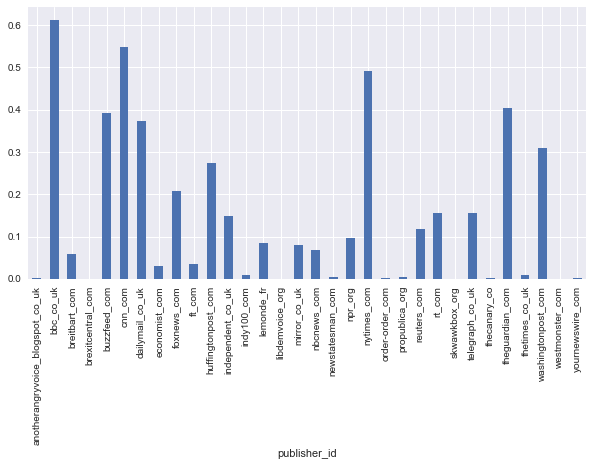

In [24]:
lead_proposal_1.groupby(data.publisher_id).mean().plot.bar(figsize=[10,5])

Yes. Let's try taking the log of the alexa rank and see if that looks better.

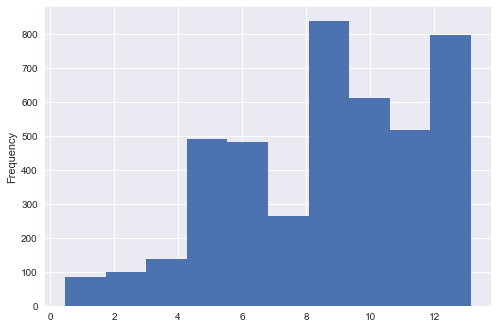

In [25]:
lead_proposal_2 = (lead_articles.mins_as_lead.clip_upper(60) / np.log(lead_articles.alexa_rank))
lead_proposal_2.plot.hist()

In [26]:
lead_proposal_2.groupby(data.publisher_id).describe()

,count,mean,std,min,25%,50%,75%,max
publisher_id,,,,,,,,
anotherangryvoice_blogspot_co_uk,28.00,5.33,0.00,5.33,5.33,5.33,5.33,5.33
bbc_co_uk,111.00,12.88,1.25,5.26,13.15,13.15,13.15,13.15
breitbart_com,202.00,8.42,1.16,1.30,8.69,8.69,8.69,8.69
brexitcentral_com,40.00,4.59,0.00,4.59,4.59,4.59,4.59,4.59
buzzfeed_com,331.00,11.55,1.69,2.00,12.02,12.02,12.02,12.02
cnn_com,212.00,12.39,1.82,1.07,12.89,12.89,12.89,12.89
dailymail_co_uk,180.00,11.63,1.11,2.96,11.85,11.85,11.85,11.85
economist_com,65.00,7.54,1.67,0.67,7.99,7.99,7.99,7.99
foxnews_com,106.00,10.45,1.09,0.88,10.61,10.61,10.61,10.61


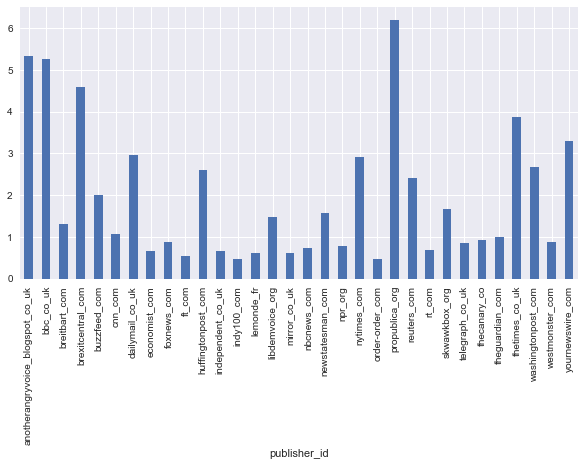

In [27]:
lead_proposal_2.groupby(data.publisher_id).min().plot.bar(figsize=[10,5])

That looks about right, as long as the smaller publishers were closer to zero. So let's apply feature scaling to this, to give a number between 1 and 20. (Anything not as lead will pass though as zero.)

In [28]:
def rescale(series):
    return (series - series.min()) / (series.max() - series.min())

lead_proposal_3 = np.ceil(20 * rescale(lead_proposal_2))

In [29]:
lead_proposal_2.min(), lead_proposal_2.max()

(0.46948415885821004, 13.145359968846892)

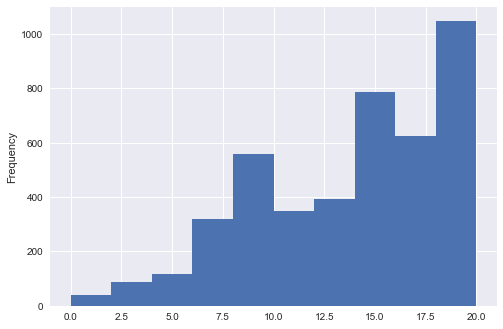

In [30]:
lead_proposal_3.plot.hist()

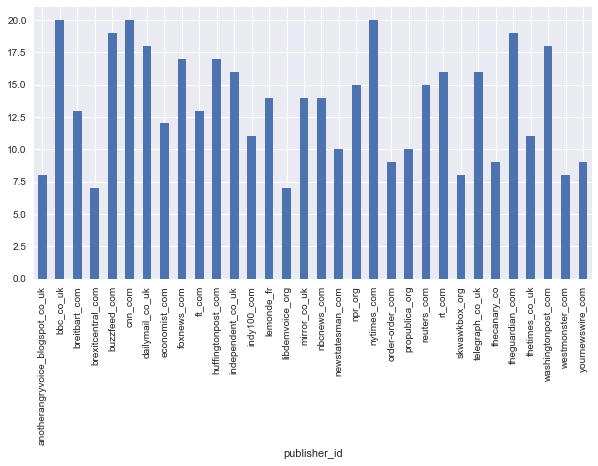

In [31]:
lead_proposal_3.groupby(data.publisher_id).median().plot.bar(figsize=[10,5])

In [32]:
data["lead_score"] = pd.concat([lead_proposal_3, data.mins_as_lead[data.mins_as_lead==0]])

In [33]:
data.lead_score.value_counts().sort_index()

0.00     148799
1.00         37
2.00         46
3.00         40
4.00         59
5.00         58
6.00         79
7.00        242
8.00        249
9.00        310
10.00       171
11.00       176
12.00        87
13.00       307
14.00       531
15.00       254
16.00       359
17.00       266
18.00       250
19.00       441
20.00       356
Name: lead_score, dtype: int64

In [34]:
data.lead_score.groupby(data.publisher_id).max()

publisher_id
anotherangryvoice_blogspot_co_uk    8.00
bbc_co_uk                          20.00
breitbart_com                      13.00
brexitcentral_com                   7.00
buzzfeed_com                       19.00
cnn_com                            20.00
dailymail_co_uk                    18.00
economist_com                      12.00
evolvepolitics_com                  0.00
foxnews_com                        17.00
ft_com                             13.00
huffingtonpost_com                 17.00
independent_co_uk                  16.00
indy100_com                        11.00
lemonde_fr                         14.00
libdemvoice_org                     7.00
mirror_co_uk                       14.00
nbcnews_com                        14.00
newstatesman_com                   10.00
npr_org                            15.00
nytimes_com                        20.00
order-order_com                     9.00
propublica_org                     10.00
reuters_com                        15.00
rt_

In summary then, score for article $a$ is:


$$
unscaledLeadScore_a = \frac{\min(minsAsLead_a, 60)}{\log(alexaRank_a)}\\
leadScore_a = 19 \cdot 
\frac{unscaledLeadScore_a - \min(unscaledLeadScore)}
{\max(unscaledLeadScore) - \min(unscaledLeadScore)} 
+ 1
$$

Since the minium value of $minsAsLead$ is 1, $\min(unscaledLeadScore)$ is pretty insignificant. So we can simplify this to:

$$
leadScore_a = 20 \cdot 
\frac{unscaledLeadScore_a }
     {\max(unscaledLeadScore)} 
$$

or: 

$$
leadScore_a = 20 \cdot 
\frac{\frac{\min(minsAsLead_a, 60)}{\log(alexaRank_a)} }
     {\frac{60}{\log(\max(alexaRank))}} 
$$

$$
leadScore_a = \left( 20 \cdot 
\frac{\min(minsAsLead_a, 60)}{\log(alexaRank_a)} \cdot
     {\frac{\log(\max(alexaRank))}{60}} \right)
$$

## Time on front score (15 points)

This is similar to time as lead, so lets try doing the same calculation, except we also want to factor in the number of slots on the front:


$$frontScore_a = 
15 
\left(\frac{\min(minsOnFront_a, 1440)}{alexaRank_a \cdot numArticlesOnFront_a}\right) 
\left( \frac{\min(alexaRank \cdot numArticlesOnFront)}{1440} \right)$$

In [35]:
(data.alexa_rank * data.num_articles_on_front).min() / 1440

2.4500000000000002

In [36]:
time_on_front_proposal_1 = np.ceil(data.mins_on_front.clip_upper(1440) / (data.alexa_rank * data.num_articles_on_front) * (2.45) * 15)

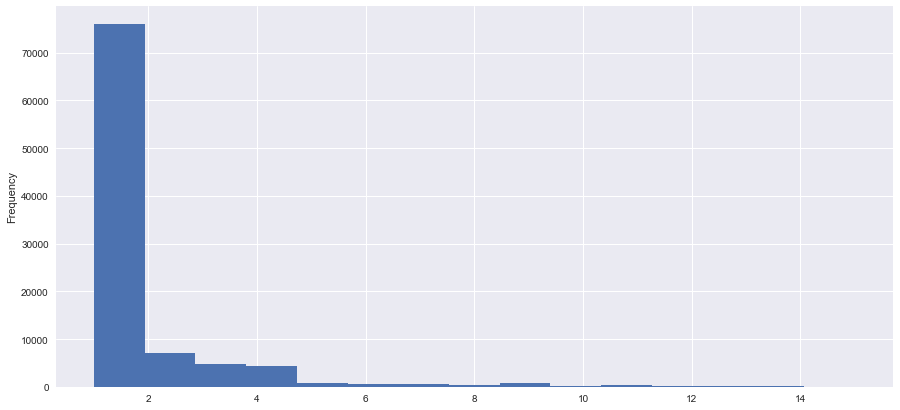

In [37]:
time_on_front_proposal_1.plot.hist(figsize=(15, 7), bins=15)

In [38]:
time_on_front_proposal_1.value_counts().sort_index()

1.00     75945
2.00      7136
3.00      4789
4.00      4278
5.00       878
6.00       691
7.00       586
8.00       461
9.00       785
10.00      265
11.00      360
12.00      242
13.00      143
14.00       70
15.00       49
dtype: int64

In [39]:
time_on_front_proposal_1.groupby(data.publisher_id).sum()

publisher_id
anotherangryvoice_blogspot_co_uk      28.00
bbc_co_uk                          15065.00
breitbart_com                       2511.00
brexitcentral_com                     49.00
buzzfeed_com                       10691.00
cnn_com                            12825.00
dailymail_co_uk                    14849.00
economist_com                        306.00
evolvepolitics_com                    60.00
foxnews_com                         7982.00
ft_com                              3173.00
huffingtonpost_com                  8120.00
independent_co_uk                   4474.00
indy100_com                          524.00
lemonde_fr                          3831.00
libdemvoice_org                      156.00
mirror_co_uk                       10157.00
nbcnews_com                         1916.00
newstatesman_com                     469.00
npr_org                             2713.00
nytimes_com                         9621.00
order-order_com                      244.00
propublica_org     

That looks good to me.

In [40]:
data["front_score"] = np.ceil(data.mins_on_front.clip_upper(1440) / (data.alexa_rank * data.num_articles_on_front) * (2.45) * 15).fillna(0)

In [41]:
data.front_score 

id
6709592f25cbe37c8c42157a3e31529a6997d919   1.00
e11638f9f5eb587404372cc1f1554a828ae6ef90   1.00
9b64c5e6ba5cfd51dad3619a8ea341eba1a12d01   1.00
bc098ae138bc4659f0d723dd13a6df94bf27de1c   1.00
295570fc56f70ffec0f5c1c13028640a988f90e1   1.00
ff04d53263605f5efc6c6d76caf017ba8e5b8509   1.00
970471ce0301861cd2b0779962dc3472b046ecea   1.00
4a168ba227abeb2a58f82f30fff5b32a03f29385   1.00
c7597aad01cd3c53687acb8b61508bda6e5d225a   1.00
56f399ce2d7a57364e10d40374cdc97179a081ad   1.00
f4e3b123fc07a47ccf453898247445941fce5698   1.00
cde01d750345c11f090de5878b5670911764023a   1.00
bff2cf0f5dccd112114bee2bef44b9b997614c8f   1.00
80ac264faa1e7d33d259e7fb8fd23e407b206a5f   1.00
e0c6d47ad0eff33ec01de70358e9ac08ac174ceb   1.00
cabb3998d53aad09eccecf39fdff2439f4f5a633   1.00
61203ee49335a3ef45f2ce2569add6ee81218656   1.00
64062be203288cee65392ecf145b251530a6bcae   1.00
bed3040ac7e43058687d705dd6a81e0f4bd68fdc   1.00
bc7d67564c937e73a95973a15df2cf188a048599   1.00
fcda9a52108c426979159fdf116b91633e72e

## Facebook brand page promotion (15 points)

One way a publisher has of promoting content is to post to their brand page. The significance of doing so is stronger when the brand page has more followers (likes).

$$ facebookPromotionProposed1_a = 15 \left( \frac {brandPageLikes_a} {\max(brandPageLikes)} \right) $$

Now lets explore the data to see if that makes sense. **tr;dr the formula above is incorrect**

In [42]:
data.fb_brand_page_likes.max()

45711259.0

In [43]:
facebook_promotion_proposed_1 = np.ceil((15 * (data.fb_brand_page_likes / data.fb_brand_page_likes.max())).fillna(0))

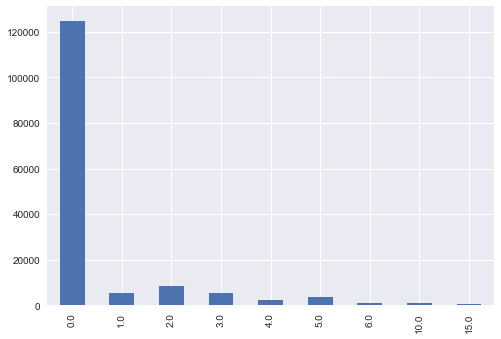

In [44]:
facebook_promotion_proposed_1.value_counts().sort_index().plot.bar()

In [45]:
facebook_promotion_proposed_1.groupby(data.publisher_id).describe()

,count,mean,std,min,25%,50%,75%,max
publisher_id,,,,,,,,
anotherangryvoice_blogspot_co_uk,28.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00
bbc_co_uk,12656.00,0.60,2.94,0.00,0.00,0.00,0.00,15.00
breitbart_com,2661.00,0.83,0.99,0.00,0.00,0.00,2.00,2.00
brexitcentral_com,49.00,0.98,0.14,0.00,1.00,1.00,1.00,1.00
buzzfeed_com,1457.00,0.42,0.49,0.00,0.00,0.00,1.00,1.00
cnn_com,4435.00,2.33,4.23,0.00,0.00,0.00,0.00,10.00
dailymail_co_uk,24668.00,0.57,1.59,0.00,0.00,0.00,0.00,5.00
economist_com,484.00,2.50,1.12,0.00,3.00,3.00,3.00,3.00
evolvepolitics_com,64.00,0.84,0.37,0.00,1.00,1.00,1.00,1.00


That's too much variation: sites like the Guardian, which have a respectable 7.5m likes, should not be scoring a 3. Lets try applying a log to it, and then standard feature scaling again.

In [46]:
data.fb_brand_page_likes.groupby(data.publisher_id).max()

publisher_id
anotherangryvoice_blogspot_co_uk     330551.00
bbc_co_uk                          45711259.00
breitbart_com                       3803903.00
brexitcentral_com                     14522.00
buzzfeed_com                        2902337.00
cnn_com                            29591651.00
dailymail_co_uk                    14227830.00
economist_com                       8450845.00
evolvepolitics_com                   126771.00
foxnews_com                        16183276.00
ft_com                              3743010.00
huffingtonpost_com                  9846648.00
independent_co_uk                   8048146.00
indy100_com                          235483.00
lemonde_fr                          4019902.00
libdemvoice_org                        8629.00
mirror_co_uk                        2970189.00
nbcnews_com                         9522368.00
newstatesman_com                     154752.00
npr_org                             6281946.00
nytimes_com                        15274145.00


In [47]:
np.log(2149)

7.6727578966425103

In [48]:
np.log(data.fb_brand_page_likes.groupby(data.publisher_id).max())

publisher_id
anotherangryvoice_blogspot_co_uk   12.71
bbc_co_uk                          17.64
breitbart_com                      15.15
brexitcentral_com                   9.58
buzzfeed_com                       14.88
cnn_com                            17.20
dailymail_co_uk                    16.47
economist_com                      15.95
evolvepolitics_com                 11.75
foxnews_com                        16.60
ft_com                             15.14
huffingtonpost_com                 16.10
independent_co_uk                  15.90
indy100_com                        12.37
lemonde_fr                         15.21
libdemvoice_org                     9.06
mirror_co_uk                       14.90
nbcnews_com                        16.07
newstatesman_com                   11.95
npr_org                            15.65
nytimes_com                        16.54
order-order_com                    10.72
propublica_org                     12.84
reuters_com                        15.19
rt_

That's more like it, but the lower numbers should be smaller.

In [49]:
np.log(data.fb_brand_page_likes.groupby(data.publisher_id).max() / 1000)

publisher_id
anotherangryvoice_blogspot_co_uk    5.80
bbc_co_uk                          10.73
breitbart_com                       8.24
brexitcentral_com                   2.68
buzzfeed_com                        7.97
cnn_com                            10.30
dailymail_co_uk                     9.56
economist_com                       9.04
evolvepolitics_com                  4.84
foxnews_com                         9.69
ft_com                              8.23
huffingtonpost_com                  9.19
independent_co_uk                   8.99
indy100_com                         5.46
lemonde_fr                          8.30
libdemvoice_org                     2.16
mirror_co_uk                        8.00
nbcnews_com                         9.16
newstatesman_com                    5.04
npr_org                             8.75
nytimes_com                         9.63
order-order_com                     3.82
propublica_org                      5.93
reuters_com                         8.28
rt_

In [50]:
scaled_fb_brand_page_likes = (data.fb_brand_page_likes / 1000)
facebook_promotion_proposed_2 = np.ceil(\
    (15 * \
     (np.log(scaled_fb_brand_page_likes) / np.log(scaled_fb_brand_page_likes.max()))\
    )\
                                       ).fillna(0)

In [51]:
facebook_promotion_proposed_2.groupby(data.publisher_id).max()

publisher_id
anotherangryvoice_blogspot_co_uk    9.00
bbc_co_uk                          15.00
breitbart_com                      12.00
brexitcentral_com                   4.00
buzzfeed_com                       12.00
cnn_com                            15.00
dailymail_co_uk                    14.00
economist_com                      13.00
evolvepolitics_com                  7.00
foxnews_com                        14.00
ft_com                             12.00
huffingtonpost_com                 13.00
independent_co_uk                  13.00
indy100_com                         8.00
lemonde_fr                         12.00
libdemvoice_org                     4.00
mirror_co_uk                       12.00
nbcnews_com                        13.00
newstatesman_com                    8.00
npr_org                            13.00
nytimes_com                        14.00
order-order_com                     6.00
propublica_org                      9.00
reuters_com                        12.00
rt_

LGTM. So the equation is


$$ facebookPromotion_a = 15 \left( 
\frac {\log(\frac {brandPageLikes_a}{1000})} 
{\log(\frac {\max(brandPageLikes)}{1000}))} \right) $$


Now, let's try applying standard feature scaling approch to this, rather than using a magic number of 1,000. That equation would be:

\begin{align}
unscaledFacebookPromotion_a &= 
   \log(brandPageLikes_a) \\
facebookPromotion_a &= 
   15 \cdot \frac{unscaledFacebookPromotion_a - \min(unscaledFacebookPromotion)}{\max(unscaledFacebookPromotion) - \min(unscaledFacebookPromotion)}  \\
\\
\text{The scaling can be simplified to:} \\
facebookPromotion_a &= 
   15 \cdot \frac{unscaledFacebookPromotion_a - \log(\min(brandPageLikes))}{\log(\max(brandPageLikes)) - \log(\min(brandPageLikes))}  \\
\\
\text{Meaning the overall equation becomes:} \\
facebookPromotion_a &= 
   15 \cdot \frac{\log(brandPageLikes_a) - \log(\min(brandPageLikes))}{\log(\max(brandPageLikes)) - \log(\min(brandPageLikes))} 
   \end{align}


In [52]:
facebook_promotion_proposed_3 = np.ceil(
    (14 * 
     ( 
         (np.log(data.fb_brand_page_likes) - np.log(data.fb_brand_page_likes.min()) ) /
         (np.log(data.fb_brand_page_likes.max()) - np.log(data.fb_brand_page_likes.min()))
     )
    ) + 1
                                       )

In [53]:
facebook_promotion_proposed_3.groupby(data.publisher_id).max()

publisher_id
anotherangryvoice_blogspot_co_uk    8.00
bbc_co_uk                          15.00
breitbart_com                      12.00
brexitcentral_com                   3.00
buzzfeed_com                       11.00
cnn_com                            15.00
dailymail_co_uk                    14.00
economist_com                      13.00
evolvepolitics_com                  6.00
foxnews_com                        14.00
ft_com                             12.00
huffingtonpost_com                 13.00
independent_co_uk                  13.00
indy100_com                         7.00
lemonde_fr                         12.00
libdemvoice_org                     2.00
mirror_co_uk                       11.00
nbcnews_com                        13.00
newstatesman_com                    7.00
npr_org                            12.00
nytimes_com                        14.00
order-order_com                     5.00
propublica_org                      8.00
reuters_com                        12.00
rt_

In [54]:
data["facebook_promotion_score"] = facebook_promotion_proposed_3.fillna(0.0)

# Review

In [55]:
data["promotion_score"] = (data.lead_score + data.front_score + data.facebook_promotion_score)
data["attention_index"] = (data.promotion_score + data.response_score)

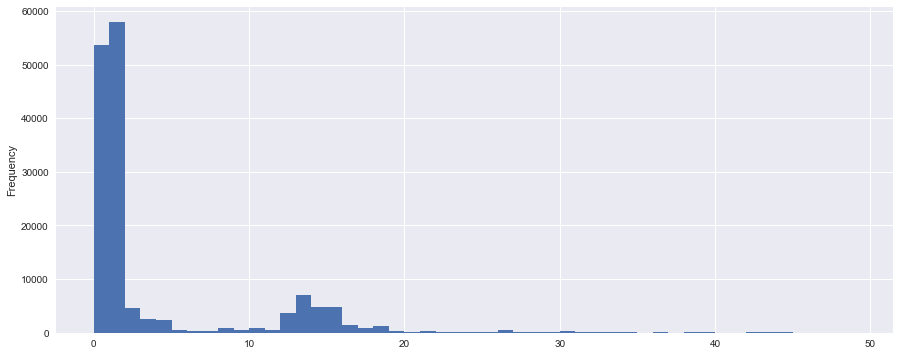

In [56]:
data.promotion_score.plot.hist(bins=np.arange(50), figsize=(15,6))

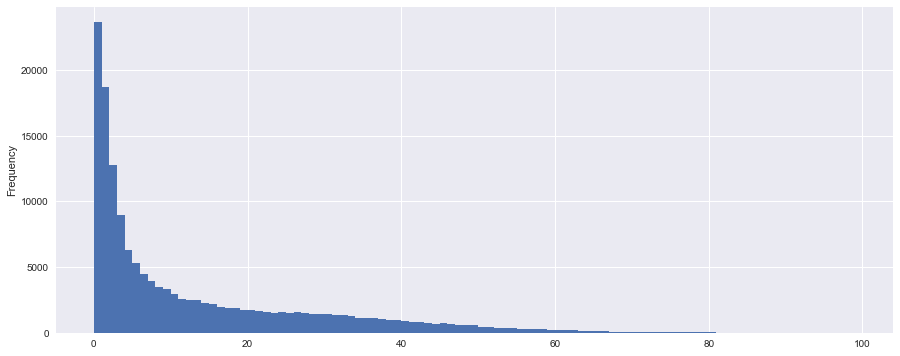

In [57]:
data.attention_index.plot.hist(bins=np.arange(100), figsize=(15,6))

In [58]:
data.attention_index.value_counts().sort_index()

0.00     23633
1.00     18731
2.00     12787
3.00      8984
4.00      6282
5.00      5323
6.00      4475
7.00      3959
8.00      3472
9.00      3364
10.00     2965
11.00     2604
12.00     2532
13.00     2487
14.00     2270
15.00     2156
16.00     1953
17.00     1869
18.00     1865
19.00     1697
20.00     1754
21.00     1655
22.00     1566
23.00     1541
24.00     1598
25.00     1537
26.00     1548
27.00     1507
28.00     1414
29.00     1415
         ...  
65.00      137
66.00      126
67.00       85
68.00       96
69.00       65
70.00       56
71.00       54
72.00       45
73.00       41
74.00       47
75.00       28
76.00       38
77.00       33
78.00       30
79.00       25
80.00       29
81.00       22
82.00       22
83.00       19
84.00       16
85.00       13
86.00       11
87.00       12
88.00       15
89.00        8
90.00        7
91.00        4
92.00        3
93.00        3
94.00        2
Name: attention_index, Length: 95, dtype: int64

In [59]:
# and lets see the articles with the biggest attention index
data.sort_values("attention_index", ascending=False)

,url,headline,discovered,published,fb_engagements,fb_max_engagements_per_min,fb_max_engagements_per_min_time,fb_comments,fb_reactions,fb_shares,...,fb_brand_page_likes,fb_brand_page_time,alexa_rank,word_count,response_score,lead_score,front_score,facebook_promotion_score,promotion_score,attention_index
id,,,,,,,,,,,,,,,,,,,,,
d3e36a9aec548acb3aa6e52fb2960b896ed2bb30,http://www.cnn.com/2018/01/18/politics/kfile-c...,"Trump appointee Carl Higbie made racist, sexis...",2018-01-18 23:22:22.097,2018-01-18 23:19:53.000,82049,143.27,2018-01-19T02:15:17.846Z,21737,44033,16279,...,29503636.00,2018-01-19T02:00:26.000Z,105,1895.00,50.00,20.00,9.00,15.00,44.00,94.00
46dbfbb92005da970c527bb3252280bb9a80a59b,http://www.cnn.com/2018/01/03/politics/bannon-...,Bannon: 2016 Trump Tower meeting was 'treasonous',2018-01-03 14:28:22.755,2018-01-03 14:23:20.000,82456,239.51,2018-01-03T16:14:12.826Z,30056,40458,11942,...,29378732.00,2018-01-03T14:39:05.000Z,105,213.00,50.00,20.00,9.00,15.00,44.00,94.00
836e90a16e36d69e3bae8639d593540609a492bb,https://www.buzzfeed.com/mollyhensleyclancy/am...,Amazon CEO Says He Will Give $33 Million To DA...,2018-01-12 18:13:09.758,2018-01-12 17:41:10.000,87223,90.60,2018-01-13T03:48:08.456Z,3014,79490,4719,...,2832832.00,2018-01-12T21:23:51.000Z,147,394.00,50.00,19.00,13.00,11.00,43.00,93.00
0c2106548a33f2a7484f41b2837ea474f3f3ba28,http://www.cnn.com/2018/01/13/politics/hawaii-...,Missile threat alert for Hawaii a false alarm,2018-01-13 18:49:25.317,2018-01-13 18:47:27.000,127664,423.06,2018-01-13T20:14:11.190Z,46730,64532,16402,...,29450153.00,2018-01-13T19:00:05.000Z,105,151.00,50.00,20.00,8.00,15.00,43.00,93.00
031074c129960b10fef8e16248004635dec0c4bc,http://money.cnn.com/2018/01/08/media/oprah-go...,Oprah's Golden Globes speech sounds like the s...,2018-01-08 14:24:28.728,2018-01-08 13:43:13.000,270420,488.99,2018-01-08T16:56:07.305Z,118451,136331,15638,...,29403330.00,2018-01-08T14:30:12.000Z,105,nan,50.00,20.00,8.00,15.00,43.00,93.00
5449f01e35cad5f97ef4c67fc9e7426f1c3a9c32,https://www.buzzfeed.com/darrensands/maxine-wa...,Maxine Waters Is Giving A National Address On ...,2018-01-26 23:24:14.272,2018-01-26 23:17:14.000,66115,48.89,2018-01-27T18:41:10.932Z,12582,46117,7416,...,2840906.00,2018-01-27T03:31:24.000Z,147,506.00,49.00,19.00,13.00,11.00,43.00,92.00
b9d5a53dc38085bebff40395f900b84bfa4ee6e4,https://www.buzzfeed.com/claudiarosenbaum/glee...,"""Glee"" Star Mark Salling Has Been Found Dead A...",2018-01-30 18:43:57.665,2018-01-30 18:29:47.000,71995,241.28,2018-01-30T19:06:07.944Z,29088,36326,6581,...,2872459.00,2018-01-30T18:42:41.000Z,147,340.00,49.00,19.00,13.00,11.00,43.00,92.00
a89037c0b486187e70b6f78bcf6a1b107f90a5fc,https://www.buzzfeed.com/claudiarosenbaum/yout...,YouTube Cuts Business Ties With Logan Paul Ami...,2018-01-11 00:22:17.301,2018-01-11 00:17:37.000,62951,277.34,2018-01-11T22:04:14.039Z,9702,50765,2484,...,2831171.00,2018-01-11T01:15:22.000Z,147,435.00,48.00,19.00,14.00,11.00,44.00,92.00
325a9e972176c2e8346af4898db4b02db0533467,http://www.bbc.co.uk/news/world-europe-42851668,Ikea founder Kamprad dies at 91,2018-01-28 10:43:09.711,2018-01-28 10:40:44.000,46121,691.93,2018-01-28T14:04:13.609Z,6628,33679,5814,...,45634425.00,2018-01-28T11:14:27.000Z,96,63.00,46.00,20.00,10.00,15.00,45.00,91.00


In [60]:
data["score_diff"] = data.promotion_score - data.response_score

In [61]:
# promoted but low response
data.sort_values("score_diff", ascending=False).head(25)

,url,headline,discovered,published,fb_engagements,fb_max_engagements_per_min,fb_max_engagements_per_min_time,fb_comments,fb_reactions,fb_shares,...,fb_brand_page_time,alexa_rank,word_count,response_score,lead_score,front_score,facebook_promotion_score,promotion_score,attention_index,score_diff
id,,,,,,,,,,,,,,,,,,,,,
068b7cac1ba2fb9fbbdec4f11a72939a7f50c246,https://www.buzzfeed.com/nicolenguyen/how-to-s...,"How To Save Money, According To People Who Are...",2018-01-24 23:22:11.826,2018-01-11 20:23:03,0,0.00,2018-01-24T23:33:10.999Z,0,0,0,...,2018-01-25T03:44:32.000Z,147,1564.00,0.00,19.00,13.00,11.00,43.00,43.00,43.00
20bcf4e6d32506b0ae7be2a902e442bcbaf7b560,https://www.buzzfeed.com/stephaniemlee/food-in...,Here’s How The Food Industry Justifies Adverti...,2018-01-06 15:44:13.488,2018-01-05 01:45:54,4,0.10,2018-01-06T15:55:15.366Z,0,0,4,...,2018-01-06T18:14:55.000Z,147,1009.00,1.00,19.00,14.00,11.00,44.00,45.00,43.00
2d6b7abf9b304cea66b7a876e276408374574957,https://www.buzzfeed.com/jtes/shes-17-and-want...,She’s 17 And Wants To Be A Politician. Her Dad...,2018-01-16 15:04:30.976,2018-01-09 20:55:30,3,0.27,2018-01-16T15:16:07.887Z,0,0,3,...,2018-01-20T17:32:05.000Z,147,3933.00,1.00,19.00,13.00,11.00,43.00,44.00,42.00
f4b77490386f612eb0a3cb4a692a8dd7155c54cb,https://www.buzzfeed.com/thomasfrank/secret-mo...,Secret Money: How Trump Made Millions Selling ...,2018-01-12 14:37:21.997,2018-01-10 22:27:30,5,0.50,2018-01-12T14:48:13.783Z,0,0,5,...,2018-01-12T15:55:07.000Z,147,3863.00,1.00,19.00,13.00,11.00,43.00,44.00,42.00
968d49aee54385668d5cbb27da9406781f04d699,https://www.buzzfeed.com/remysmidt/mila-emma-k...,Here’s What It’s Like To Have A Toddler Who Is...,2018-01-25 13:46:20.267,2018-01-23 21:56:06,4,0.39,2018-01-25T13:57:24.612Z,0,2,2,...,2018-01-25T14:23:03.000Z,147,2551.00,1.00,19.00,13.00,11.00,43.00,44.00,42.00
01bc6bc560d98aaee1d28dcbc8cd713dbd5b9869,https://www.buzzfeed.com/holgerroonemaa/he-bui...,He Built An Empire From Angry Birds. Now He Wa...,2018-01-17 16:01:28.336,2018-01-12 22:27:34,4,0.37,2018-01-17T16:13:13.090Z,0,2,2,...,2018-01-21T15:03:14.000Z,147,1411.00,1.00,19.00,13.00,11.00,43.00,44.00,42.00
d2645225548e8c3f460c983f79d2b5a875e4d295,https://www.buzzfeed.com/gabrielsanchez/the-ho...,23 Pictures That Capture The Horrors Of The Ho...,2018-01-27 16:01:15.901,2018-01-25 17:01:28,2,0.18,2018-01-27T16:13:08.100Z,0,0,2,...,2018-01-27T21:42:59.000Z,147,nan,1.00,19.00,12.00,11.00,42.00,43.00,41.00
2e3e87dfe855f9cc6268036577e2fdf743a22c40,https://www.buzzfeed.com/peteraldhous/trump-tw...,How Trump’s Tweets Shaped A Year In Politics,2018-01-23 15:29:12.177,2018-01-23 11:50:57,45,0.15,2018-01-23T21:46:14.335Z,5,17,23,...,2018-01-23T19:44:39.000Z,147,1017.00,6.00,19.00,14.00,11.00,44.00,50.00,38.00
6a35a172d4c5c2a9dda4b89cd53f1c1787b7246c,https://www.buzzfeed.com/paulmcleod/the-fate-o...,The Fate Of DACA Recipients May Come Down To F...,2018-01-10 20:40:17.887,2018-01-10 20:37:02,30,0.11,2018-01-10T23:54:09.386Z,2,2,26,...,2018-01-13T19:21:54.000Z,147,1046.00,5.00,19.00,13.00,11.00,43.00,48.00,38.00


In [62]:
# high response but not promoted
data.sort_values("score_diff", ascending=True).head(25)

,url,headline,discovered,published,fb_engagements,fb_max_engagements_per_min,fb_max_engagements_per_min_time,fb_comments,fb_reactions,fb_shares,...,fb_brand_page_time,alexa_rank,word_count,response_score,lead_score,front_score,facebook_promotion_score,promotion_score,attention_index,score_diff
id,,,,,,,,,,,,,,,,,,,,,
803b607134c251c7f072a2971a268e9d7df235f1,https://www.huffingtonpost.com/entry/detroit-h...,Black Beekeepers Are Transforming Detroit’s Va...,2018-01-30 22:04:27.140,2018-01-30 21:55:24.297,99088,191.45,2018-01-31T22:05:12.382Z,5852,81139,12097,...,NaN,215,583.00,50.00,0.00,0.00,0.00,0.00,50.00,-50.00
a393b7e68704544e101afc19f12d7fccf1e4ab29,https://www.nytimes.com/2018/01/06/us/politics...,"Trump Defends His Mental Capacity, Calling Him...",2018-01-06 13:07:03.430,2018-01-06 13:05:21.000,328205,1162.29,2018-01-07T04:03:08.078Z,85369,219767,23069,...,NaN,120,176.00,50.00,0.00,0.00,0.00,0.00,50.00,-50.00
771937ba1ca44a5bab7f2bf908ed2a617a461b5f,http://www.cnn.com/2015/08/21/europe/france-tr...,2 U.S. service members overpower attacker on t...,2018-01-08 22:04:37.055,2018-01-08 22:01:45.000,286779,0.03,2018-01-08T23:17:08.269Z,16743,251594,18442,...,NaN,105,746.00,50.00,0.00,0.00,0.00,0.00,50.00,-50.00
bdcb4edf76aa052524088d63507d58de12c6f08c,http://www.foxnews.com/entertainment/2018/01/2...,Joy Villa turns heads with pro-life outfit at ...,2018-01-28 21:24:14.205,2018-01-28 21:15:38.000,145813,341.15,2018-01-29T23:27:11.734Z,10493,127537,7783,...,NaN,285,361.00,50.00,0.00,1.00,0.00,1.00,51.00,-49.00
fdeb3ce25505712faa29accfaa210a61d7dc208a,https://www.rt.com/on-air/415184-orthodox-chri...,Orthodox Christmas service in Moscow,2018-01-06 20:09:34.285,2018-01-06 20:09:34.285,180211,2985.36,2018-01-07T00:22:14.681Z,24841,11360,144010,...,NaN,365,nan,50.00,0.00,1.00,0.00,1.00,51.00,-49.00
47d6d90f0ccf562ad2636799d240cea22854b5d8,http://www.breitbart.com/big-government/2018/0...,Pentagon: Troops Will Not Be Paid if Governmen...,2018-01-17 18:09:33.475,2018-01-17 07:43:57.000,82550,50.97,2018-01-20T15:48:07.846Z,38299,33144,11107,...,NaN,994,896.00,50.00,0.00,1.00,0.00,1.00,51.00,-49.00
0f7d6665afef43e9f21cf944435ae79bacce5428,http://www.dailymail.co.uk/news/article-533244...,Police chief demands end of soft treatment for...,2018-01-30 23:58:23.681,2018-01-30 23:55:30.000,126418,1322.37,2018-01-31T12:05:10.269Z,51315,42165,32938,...,NaN,158,1235.00,50.00,0.00,1.00,0.00,1.00,51.00,-49.00
4ec1a6cfd6e184ef18478392685313d0c52fe46e,http://www.foxnews.com/entertainment/2018/01/1...,‘OUT!’ Trump orders CNN star Jim Acosta to lea...,2018-01-16 20:44:11.564,2018-01-16 20:41:23.000,81022,105.32,2018-01-17T02:56:06.018Z,18036,55513,7473,...,NaN,285,502.00,50.00,0.00,1.00,0.00,1.00,51.00,-49.00
10ea42828a1a94dcfeecd8238529bd4c43370c98,https://www.cnn.com/2018/01/24/us/rachael-denh...,Read Rachael Denhollander's full victim impact...,2018-01-24 19:10:15.381,2018-01-24 19:05:22.000,89632,135.76,2018-01-26T15:09:07.110Z,11543,70530,7559,...,NaN,105,5852.00,50.00,0.00,1.00,0.00,1.00,51.00,-49.00


Write that data to a file. Note that the scores here are provisional for two reasons:
1. they should be using a rolling-month based on the article publication date to calculate medians/min/max etc, whereas in this workbook we as just using values for the month of May
2. for analysis, we've rounded the numbers; we don't expect to do that for the actual scores

In [63]:
data.to_csv("articles_with_provisional_scores_" + date_filename + ".csv")

# Summary

The attention index of an article is comprised of four components:

- *lead score* (max 20 points) based on how long an article was the lead story on the publisher's home page, scaled by the traffic to that publisher
- *front score* (max 15 points) based on how long an article was present on the publisher's home page, scaled by traffic to that publisher
- *Facebook promotion score* (max 15 points) based on whether the article was promoted to the publisher's Facebook brand page, scaled by the reach of that brand page
- *response score* (max 50 points) based on the number of Facebook engagements the article received, relative to other articles

Or, in other words:

\begin{align}
attentionIndex_a &= leadScore_a + frontScore_a + facebookPromotionScore_a + responseScore_a \\
leadScore_a &= 20 \cdot \left(\frac{\min(minsAsLead_a, 60)}{alexaRank_a}\right) \cdot \left( \frac{\min(alexaRank)}{60} \right) \\
frontScore_a &= 
15 \cdot
\left(\frac{\min(minsOnFront_a, 1440)}{alexaRank_a \cdot numArticlesOnFront_a}\right) \cdot
\left( \frac{\min(alexaRank \cdot numArticlesOnFront)}{1440} \right) \\
facebookPromotion_a &= 
\begin{cases}
 0 \text{ if not shared on brand page }\\
   15 \cdot \frac{\log(brandPageLikes_a) - \log(\min(brandPageLikes))}{\log(\max(brandPageLikes)) - \log(\min(brandPageLikes))}  \text{ otherwise }
\end{cases}   
\\
responseScore_a &= 
\begin{cases} 
   0 \text{ if } engagements_a = 0 \\
   50 \cdot 
   \frac{\log(\min(engagements_a,limit) + median(engagements)) - \log(1 + median(engagements))}
   {\log(limit + median(engagements)) - \log(1 + median(engagements))} \text{ if } engagements_a > 0
\end{cases} \\
\end{align} 